<a id="A"></a>
# <div style="text-align:center; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:maroon; overflow:hidden"><b> Coca-Cola Stock Price - Data Preprocessing </b></div>

<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:maroon; overflow:hidden"><b> Import Dependencies </b></div>

In [141]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
fig_size=[14,8]

<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:maroon; overflow:hidden"><b> Read Cleaned Data </b></div>

In [100]:
# Load the cleaned dataset
df = pd.read_csv("../datasets/interim/coca_cola_ohlc_cleaned.csv", parse_dates=['Date'], index_col='Date')
df.head()

,open,high,low,close,volume,ticker,name,daily_return
Date,,,,,,,,
1962-01-02 00:00:00-05:00,0.0454,0.0466,0.0454,0.0454,806400,KO,The Coca-Cola Company (KO) Historical Data,NaN
1962-01-03 00:00:00-05:00,0.0447,0.0447,0.0437,0.0444,1574400,KO,The Coca-Cola Company (KO) Historical Data,-2.202643
1962-01-04 00:00:00-05:00,0.0445,0.0450,0.0445,0.0447,844800,KO,The Coca-Cola Company (KO) Historical Data,0.675676
1962-01-05 00:00:00-05:00,0.0447,0.0453,0.0436,0.0437,1420800,KO,The Coca-Cola Company (KO) Historical Data,-2.237136
1962-01-08 00:00:00-05:00,0.0433,0.0433,0.0424,0.0432,2035200,KO,The Coca-Cola Company (KO) Historical Data,-1.144165


<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:maroon; overflow:hidden"><b> Differencing </b></div>

<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Apply Differencing:  </span> <br>
<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> Differencing is applied to transform the data into stationary, which would be beneficial for Classical time-series models like ARIMA/SARIMA.  </span>

In [101]:
def difference_series(series, order=1):
    diff_series = series.diff(order).dropna()
    return diff_series

# Differencing the close price
df['diff_close'] = difference_series(df['close'])
df['diff_close'].head()

Date
1962-01-02 00:00:00-05:00       NaN
1962-01-03 00:00:00-05:00   -0.0010
1962-01-04 00:00:00-05:00    0.0003
1962-01-05 00:00:00-05:00   -0.0010
1962-01-08 00:00:00-05:00   -0.0005
Name: diff_close, dtype: float64

<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Compare and Validate Differencing </span>

In [102]:
def plot_time_graph(series, title):
    series.plot(figsize=fig_size, title=title)
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()


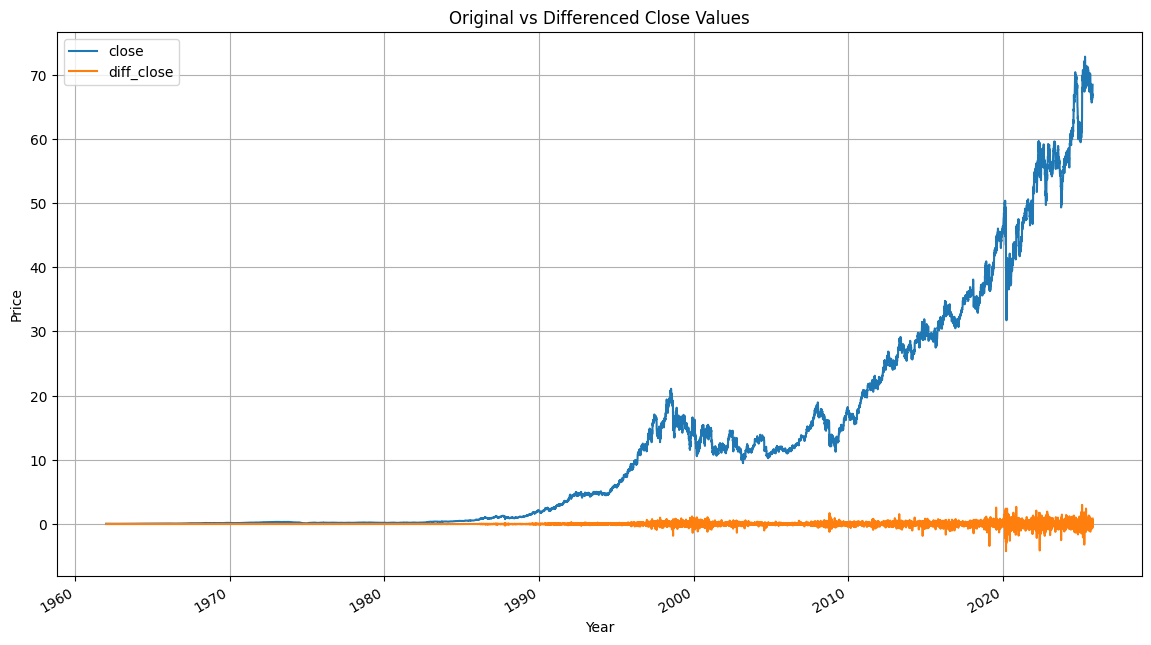

Close Mean: 13.118031923771563, Differenced Mean: 0.0042597533632286995


In [103]:
plot_time_graph(df[['close', 'diff_close']], "Original vs Differenced Close Values")

print(f"Close Mean: {df['close'].mean()}, Differenced Mean: {df['diff_close'].mean()}")

<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:maroon; overflow:hidden"><b> Lag Features </b></div>

<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black">  Lag features to identify patterns of autocorrelation.  </span>


In [104]:
def create_lag_features(data, col='close', lags=[1, 5, 10]):
    for lag in lags:
        data[f'{col}_lag_{lag}'] = data[col].shift(lag)
    return data

df = create_lag_features(df, 'close', lags=[1, 5, 10, 20])
df.head(10)


,open,high,low,close,volume,ticker,name,daily_return,diff_close,close_lag_1,close_lag_5,close_lag_10,close_lag_20
Date,,,,,,,,,,,,,
1962-01-02 00:00:00-05:00,0.0454,0.0466,0.0454,0.0454,806400,KO,The Coca-Cola Company (KO) Historical Data,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03 00:00:00-05:00,0.0447,0.0447,0.0437,0.0444,1574400,KO,The Coca-Cola Company (KO) Historical Data,-2.202643,-0.0010,0.0454,NaN,NaN,NaN
1962-01-04 00:00:00-05:00,0.0445,0.0450,0.0445,0.0447,844800,KO,The Coca-Cola Company (KO) Historical Data,0.675676,0.0003,0.0444,NaN,NaN,NaN
1962-01-05 00:00:00-05:00,0.0447,0.0453,0.0436,0.0437,1420800,KO,The Coca-Cola Company (KO) Historical Data,-2.237136,-0.0010,0.0447,NaN,NaN,NaN
1962-01-08 00:00:00-05:00,0.0433,0.0433,0.0424,0.0432,2035200,KO,The Coca-Cola Company (KO) Historical Data,-1.144165,-0.0005,0.0437,NaN,NaN,NaN
1962-01-09 00:00:00-05:00,0.0432,0.0442,0.0429,0.0440,960000,KO,The Coca-Cola Company (KO) Historical Data,1.851852,0.0008,0.0432,0.0454,NaN,NaN
1962-01-10 00:00:00-05:00,0.0440,0.0449,0.0436,0.0442,1612800,KO,The Coca-Cola Company (KO) Historical Data,0.454545,0.0002,0.0440,0.0444,NaN,NaN
1962-01-11 00:00:00-05:00,0.0442,0.0447,0.0440,0.0447,614400,KO,The Coca-Cola Company (KO) Historical Data,1.131222,0.0005,0.0442,0.0447,NaN,NaN
1962-01-12 00:00:00-05:00,0.0447,0.0447,0.0439,0.0444,883200,KO,The Coca-Cola Company (KO) Historical Data,-0.671141,-0.0003,0.0447,0.0437,NaN,NaN


<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:maroon; overflow:hidden"><b> Volatility and Rolling Mean </b></div>

<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> In order to captue local trends and volatility, the following method is utilized for Close and Volume. </span>

In [105]:
def create_rolling_features(data, col='close', windows=[7, 30, 90]):
    for w in windows:
        data[f'{col}_roll_mean_{w}'] = data[col].rolling(window=w).mean()
        data[f'{col}_roll_std_{w}']  = data[col].rolling(window=w).std()
    return data

df = create_rolling_features(df, 'close')
df = create_rolling_features(df, 'volume', windows=[7, 30])
df.head(10)

,open,high,low,close,volume,ticker,name,daily_return,diff_close,close_lag_1,...,close_roll_mean_7,close_roll_std_7,close_roll_mean_30,close_roll_std_30,close_roll_mean_90,close_roll_std_90,volume_roll_mean_7,volume_roll_std_7,volume_roll_mean_30,volume_roll_std_30
Date,,,,,,,,,,,,,,,,,,,,,
1962-01-02 00:00:00-05:00,0.0454,0.0466,0.0454,0.0454,806400,KO,The Coca-Cola Company (KO) Historical Data,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03 00:00:00-05:00,0.0447,0.0447,0.0437,0.0444,1574400,KO,The Coca-Cola Company (KO) Historical Data,-2.202643,-0.0010,0.0454,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04 00:00:00-05:00,0.0445,0.0450,0.0445,0.0447,844800,KO,The Coca-Cola Company (KO) Historical Data,0.675676,0.0003,0.0444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05 00:00:00-05:00,0.0447,0.0453,0.0436,0.0437,1420800,KO,The Coca-Cola Company (KO) Historical Data,-2.237136,-0.0010,0.0447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08 00:00:00-05:00,0.0433,0.0433,0.0424,0.0432,2035200,KO,The Coca-Cola Company (KO) Historical Data,-1.144165,-0.0005,0.0437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-09 00:00:00-05:00,0.0432,0.0442,0.0429,0.0440,960000,KO,The Coca-Cola Company (KO) Historical Data,1.851852,0.0008,0.0432,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-10 00:00:00-05:00,0.0440,0.0449,0.0436,0.0442,1612800,KO,The Coca-Cola Company (KO) Historical Data,0.454545,0.0002,0.0440,...,0.044229,0.000709,NaN,NaN,NaN,NaN,1.322057e+06,463913.292391,NaN,NaN
1962-01-11 00:00:00-05:00,0.0442,0.0447,0.0440,0.0447,614400,KO,The Coca-Cola Company (KO) Historical Data,1.131222,0.0005,0.0442,...,0.044129,0.000547,NaN,NaN,NaN,NaN,1.294629e+06,503471.832096,NaN,NaN
1962-01-12 00:00:00-05:00,0.0447,0.0447,0.0439,0.0444,883200,KO,The Coca-Cola Company (KO) Historical Data,-0.671141,-0.0003,0.0447,...,0.044129,0.000547,NaN,NaN,NaN,NaN,1.195886e+06,507223.433438,NaN,NaN


In [106]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'ticker', 'name',
       'daily_return', 'diff_close', 'close_lag_1', 'close_lag_5',
       'close_lag_10', 'close_lag_20', 'close_roll_mean_7', 'close_roll_std_7',
       'close_roll_mean_30', 'close_roll_std_30', 'close_roll_mean_90',
       'close_roll_std_90', 'volume_roll_mean_7', 'volume_roll_std_7',
       'volume_roll_mean_30', 'volume_roll_std_30'],
      dtype='object')

<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:maroon; overflow:hidden"><b> Technical Indicators </b></div>

<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> For locating trends, momentums, and smoothing out the noises in feature space. </span>

<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Moving Average Convergence Divergence (MACD) </span>


<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> Identifies the relationship between two moving averages. It indicates the direction and strength of the trend. Crossovers (MACD line and Signal line) are often strong buy/sell signals for the model to learn.  </span>

In [107]:
def compute_MACD(series, short=12, long=26, signal=9):
    short_ema = series.ewm(span=short, adjust=False).mean()
    long_ema = series.ewm(span=long, adjust=False).mean()
    
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal, adjust=False).mean()
    return macd, signal_line

df['macd'], df['macd_signal'] = compute_MACD(df['close'])


<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Perform Sanity Check on MACD </span>

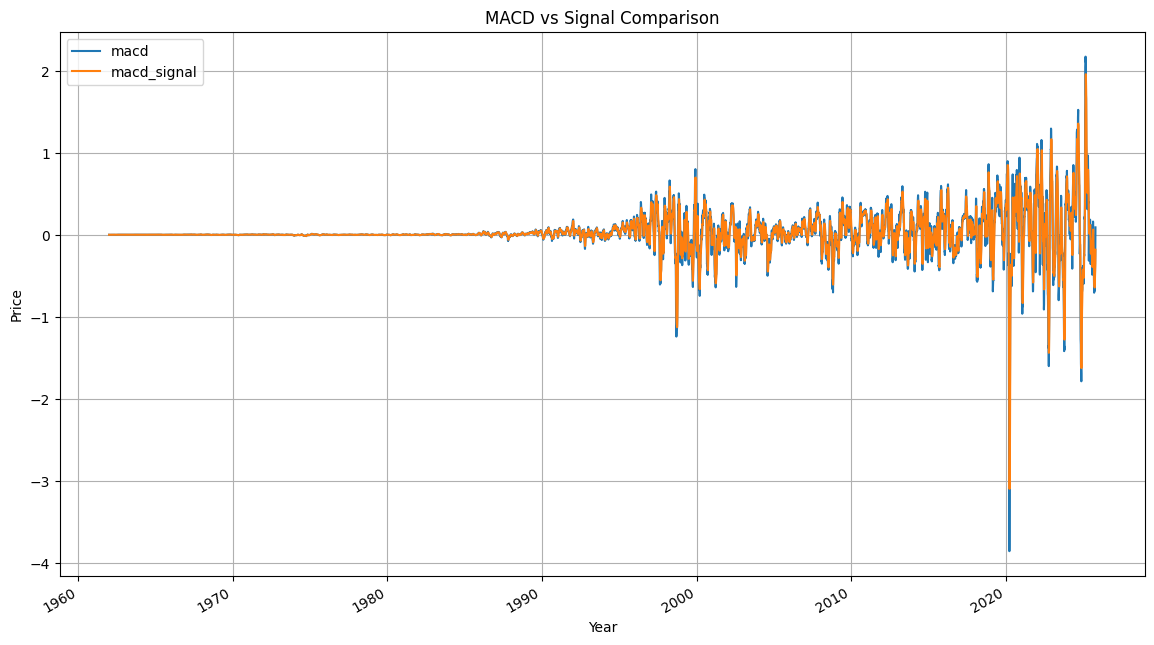

In [108]:
plot_time_graph(df[['macd', 'macd_signal']], "MACD vs Signal Comparison")


<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Relative Strength Index (RSI)  </span>

<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> This momentum oscillator can acquire the Speed and change of price movements, as it tells the model if the stock is overbought (RSI > 70) or oversold (RSI < 30). This is a critical signal for potential reversals. </span>

In [109]:
def compute_RSI(series, period=14):
    delta = series.diff()
    gain = delta.clip(lower=0)
    loss = -1 * delta.clip(upper=0)
    
    # Use EWM (Exponential Weighted Mean) for smoothing
    # The 'span' parameter makes it equivalent to a period-length SMA
    avg_gain = gain.ewm(com=period - 1, adjust=False).mean()
    avg_loss = loss.ewm(com=period - 1, adjust=False).mean()
    
    # Calculate RS and RSI
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['rsi_14'] = compute_RSI(df['close'])

<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Feature Validation for RSI over the period of 14 days. </span>

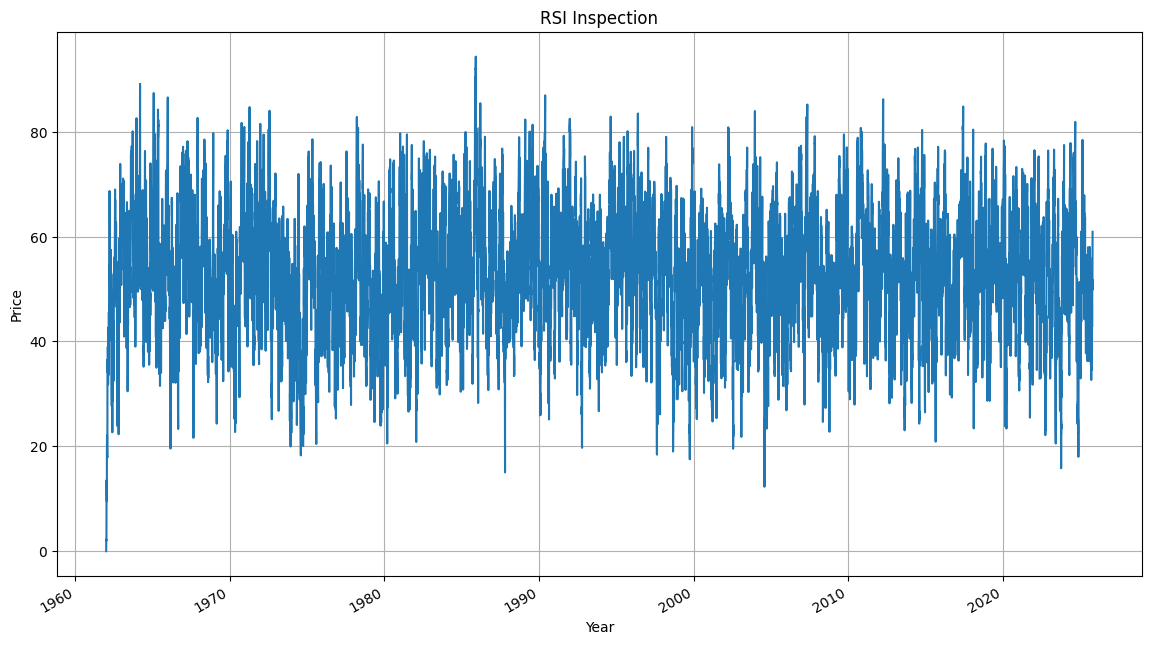

In [110]:
plot_time_graph(df['rsi_14'], "RSI Inspection")


<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Bollinger Bands </span>

<span style="font-family:Cambria; color:maroon; font-size: 20px; text-shadow: 0.6px 0.6px black"> For measuring the deviation of prices from its average. It is a technical analysis tool that consist of a middle band (a simple moving average) and two outer bands set at a specified number of standard deviations above and below the middle band. The bands widen during periods of high volatility and contract during periods of low volatility.   </span>

In [111]:
def compute_bollinger_bands(series, window=20):
    sma = series.rolling(window).mean()
    std = series.rolling(window).std()
    
    upper_band = sma + (2 * std)
    lower_band = sma - (2 * std)
    return sma, upper_band, lower_band

df['bb_middle'], df['bb_upper'], df['bb_lower'] = compute_bollinger_bands(df['close'])


<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Volatility Regimes </span>

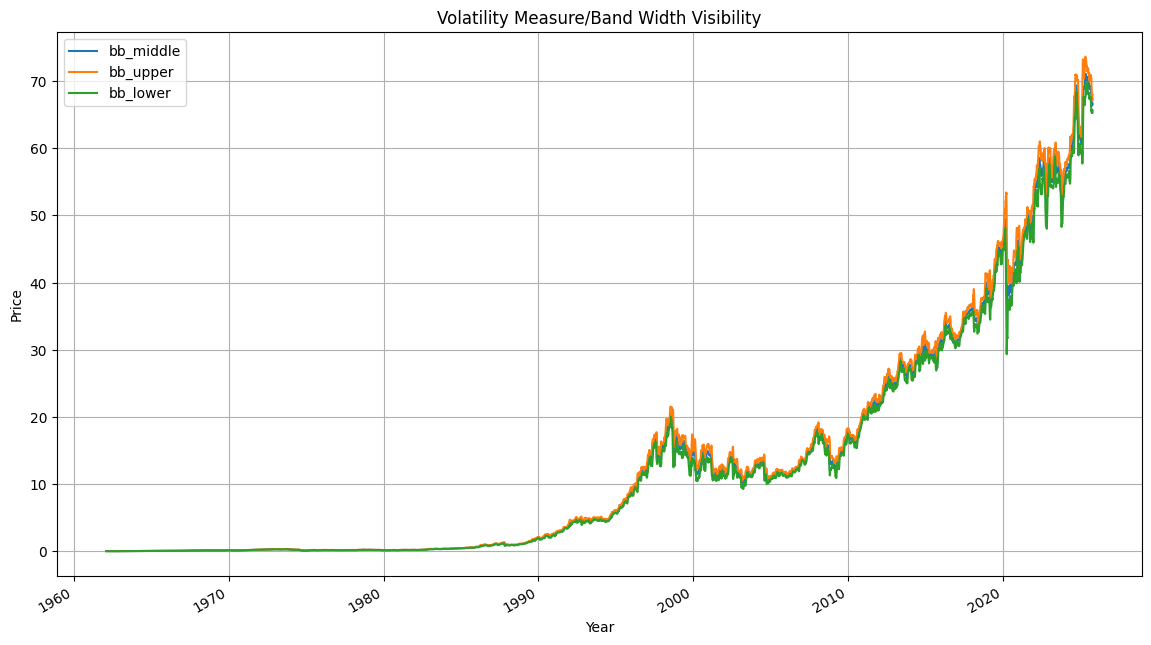

In [112]:
plot_time_graph(df[['bb_middle', 'bb_upper', 'bb_lower']], "Volatility Measure/Band Width Visibility")


<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:maroon; overflow:hidden"><b> Temporal Features </b></div>

In [113]:
def create_temporal_features(df, series):
    # To convert the index with timezone aware.
    series = pd.to_datetime(series, utc=True)
    
    df['day_of_week'] = pd.Series(series).dt.dayofweek.values
    df['month'] = series.month
    df['year'] = series.year
    df['is_month_start'] = series.is_month_start.astype(int)
    df['is_month_end'] = series.is_month_end.astype(int)
    print(df.columns)

create_temporal_features(df, df.index)

Index(['open', 'high', 'low', 'close', 'volume', 'ticker', 'name',
       'daily_return', 'diff_close', 'close_lag_1', 'close_lag_5',
       'close_lag_10', 'close_lag_20', 'close_roll_mean_7', 'close_roll_std_7',
       'close_roll_mean_30', 'close_roll_std_30', 'close_roll_mean_90',
       'close_roll_std_90', 'volume_roll_mean_7', 'volume_roll_std_7',
       'volume_roll_mean_30', 'volume_roll_std_30', 'macd', 'macd_signal',
       'rsi_14', 'bb_middle', 'bb_upper', 'bb_lower', 'day_of_week', 'month',
       'year', 'is_month_start', 'is_month_end'],
      dtype='object')


<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Handle Missing Values </span>

In [114]:
df.dropna(inplace=True)
df.isna().any()

open                   False
high                   False
low                    False
close                  False
volume                 False
ticker                 False
name                   False
daily_return           False
diff_close             False
close_lag_1            False
close_lag_5            False
close_lag_10           False
close_lag_20           False
close_roll_mean_7      False
close_roll_std_7       False
close_roll_mean_30     False
close_roll_std_30      False
close_roll_mean_90     False
close_roll_std_90      False
volume_roll_mean_7     False
volume_roll_std_7      False
volume_roll_mean_30    False
volume_roll_std_30     False
macd                   False
macd_signal            False
rsi_14                 False
bb_middle              False
bb_upper               False
bb_lower               False
day_of_week            False
month                  False
year                   False
is_month_start         False
is_month_end           False
dtype: bool

<span style="font-family:Cambria; color:maroon; font-size: 28px; text-shadow: 0.5px 0.5px black"> • Integrity Check </span>

In [115]:
df.head()

,open,high,low,close,volume,ticker,name,daily_return,diff_close,close_lag_1,...,macd_signal,rsi_14,bb_middle,bb_upper,bb_lower,day_of_week,month,year,is_month_start,is_month_end
Date,,,,,,,,,,,,,,,,,,,,,
1962-05-09 00:00:00-04:00,0.0420,0.0420,0.0413,0.0413,1267200,KO,The Coca-Cola Company (KO) Historical Data,-1.900238,-0.0008,0.0421,...,-0.000018,38.552467,0.042885,0.044317,0.041453,2,5,1962,0,0
1962-05-10 00:00:00-04:00,0.0413,0.0414,0.0407,0.0409,1920000,KO,The Coca-Cola Company (KO) Historical Data,-0.968523,-0.0004,0.0413,...,-0.000078,36.364523,0.042805,0.044485,0.041125,3,5,1962,0,0
1962-05-11 00:00:00-04:00,0.0409,0.0413,0.0392,0.0396,2380800,KO,The Coca-Cola Company (KO) Historical Data,-3.178484,-0.0013,0.0409,...,-0.000165,30.338322,0.042700,0.044864,0.040536,4,5,1962,0,0
1962-05-14 00:00:00-04:00,0.0396,0.0398,0.0379,0.0389,3187200,KO,The Coca-Cola Company (KO) Historical Data,-1.767677,-0.0007,0.0396,...,-0.000275,27.678527,0.042495,0.045238,0.039752,0,5,1962,0,0
1962-05-15 00:00:00-04:00,0.0391,0.0413,0.0391,0.0408,2534400,KO,The Coca-Cola Company (KO) Historical Data,4.884319,0.0019,0.0389,...,-0.000364,42.431558,0.042380,0.045208,0.039552,1,5,1962,0,0


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15968 entries, 1962-05-09 00:00:00-04:00 to 2025-10-17 00:00:00-04:00
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   open                 15968 non-null  float64
 1   high                 15968 non-null  float64
 2   low                  15968 non-null  float64
 3   close                15968 non-null  float64
 4   volume               15968 non-null  int64  
 5   ticker               15968 non-null  object 
 6   name                 15968 non-null  object 
 7   daily_return         15968 non-null  float64
 8   diff_close           15968 non-null  float64
 9   close_lag_1          15968 non-null  float64
 10  close_lag_5          15968 non-null  float64
 11  close_lag_10         15968 non-null  float64
 12  close_lag_20         15968 non-null  float64
 13  close_roll_mean_7    15968 non-null  float64
 14  close_roll_std_7     15968 non-null  float64
 1

<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:maroon; overflow:hidden"><b> Feature Scaling </b></div>

In [117]:
def feature_scaling(df):    
    feature_cols = [col for col in df.columns if col not in ['ticker','name','close']]
    target_col = 'close'
    
    # Split data Chronologically 80/20
    train_size = int(len(df) * 0.8)
    train_df, test_df = df.iloc[:train_size], df.iloc[train_size:]
    
    # Fit scaler on only train to avoid data leakage
    scaler = StandardScaler()
    train_scaled = train_df.copy()
    test_scaled = test_df.copy()
    
    train_scaled[feature_cols] = scaler.fit_transform(train_df[feature_cols])
    test_scaled[feature_cols] = scaler.transform(test_df[feature_cols])
    return train_df, test_df, train_scaled, test_scaled

train_df, test_df, train_scaled, test_scaled = feature_scaling(df)


In [140]:
data_map = {"train_df": train_df, "test_df": test_df, "train_scaled": train_scaled, "test_scaled": test_scaled}

print("Dataset Shapes:")
for name, data in data_map.items():
    print(f"{name}: {data.shape}")

Dataset Shapes:
train_df: (12774, 34)
test_df: (3194, 34)
train_scaled: (12774, 34)
test_scaled: (3194, 34)


<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:maroon; overflow:hidden"><b> ARIMA Model </b></div>

In [148]:
print(##)

SyntaxError: incomplete input (2432070.py, line 1)

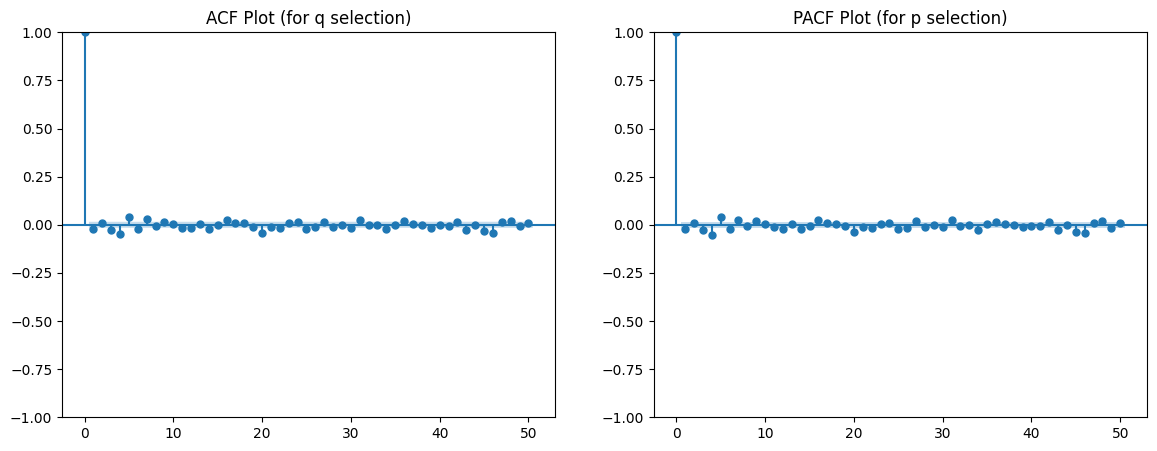

In [144]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

series = df['diff_close'].dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(series, ax=axes[0], lags=50)
plot_pacf(series, ax=axes[1], lags=50, method='ywm')
axes[0].set_title("ACF Plot (for q selection)")
axes[1].set_title("PACF Plot (for p selection)")
plt.show()


In [147]:
from pmdarima import auto_arima

series = df['close']  # let auto_arima handle differencing
auto_model = auto_arima(series, 
                        seasonal=False, 
                        stepwise=True, 
                        suppress_warnings=True,
                        max_p=5, max_q=5, d=1,
                        trace=True)
print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=733.350, Time=10.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=756.999, Time=0.74 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=750.208, Time=0.43 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=750.375, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=759.772, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=751.337, Time=3.62 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=751.512, Time=3.49 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=720.687, Time=5.41 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=730.080, Time=4.18 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=659.738, Time=8.22 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=657.782, Time=6.50 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=700.140, Time=6.40 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=659.706, Time=7.02 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=740.182, Time=1.72 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=676.

In [143]:
from statsmodels.tsa.arima.model import ARIMA

def ARIMA_model(train_df):
    model = ARIMA(train_df['close'], order=(p,1,q))
    model_fit = model.fit()
    return model_fit

arima_model = ARIMA_model(train_df)


NameError: name 'p' is not defined